In [3]:
import numpy as np
import matplotlib.pyplot as plt
from TidalPy import __version__
from TidalPy.RadialSolver import radial_solver
from TidalPy.RadialSolver.helpers import build_rs_input_homogeneous_layers
from TidalPy.rheology.models import Maxwell, Andrade, Elastic, Newton
from TidalPy.utilities.spherical_helper import calculate_mass_gravity_arrays

print(__version__)
run_times = True

radial_solver_kwargs = dict(
    surface_pressure = 0,
    degree_l = 2,
    solve_for = None,
    core_model = 0,
    use_kamata = False, 
    starting_radius = 0.0,
    start_radius_tolerance = 1.0e-5,
    integration_method = 'DOP853',
    integration_rtol = 1.0e-4,
    integration_atol = 1.0e-6,
    scale_rtols_bylayer_type = False,
    max_num_steps = 500_000,
    expected_size = 200,
    max_ram_MB = 500,
    max_step = 0,
    nondimensionalize = True,
    use_prop_matrix = False,
    verbose = False,
    warnings = False,
    raise_on_fail = False,
    eos_method_bylayer = None,
    eos_integration_method = 'RK45',
    eos_rtol = 1.0e-4,
    eos_atol = 1.0e-6,
    eos_pressure_tol = 1.0e-2,
    eos_max_iters = 50,
    perform_checks = False
)



0.6.1a2.dev1


## 1 Layer

Result Success: True Result Message: RadialSolver.ShootingMethod: Completed without any noted issues.
241 μs ± 8.59 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


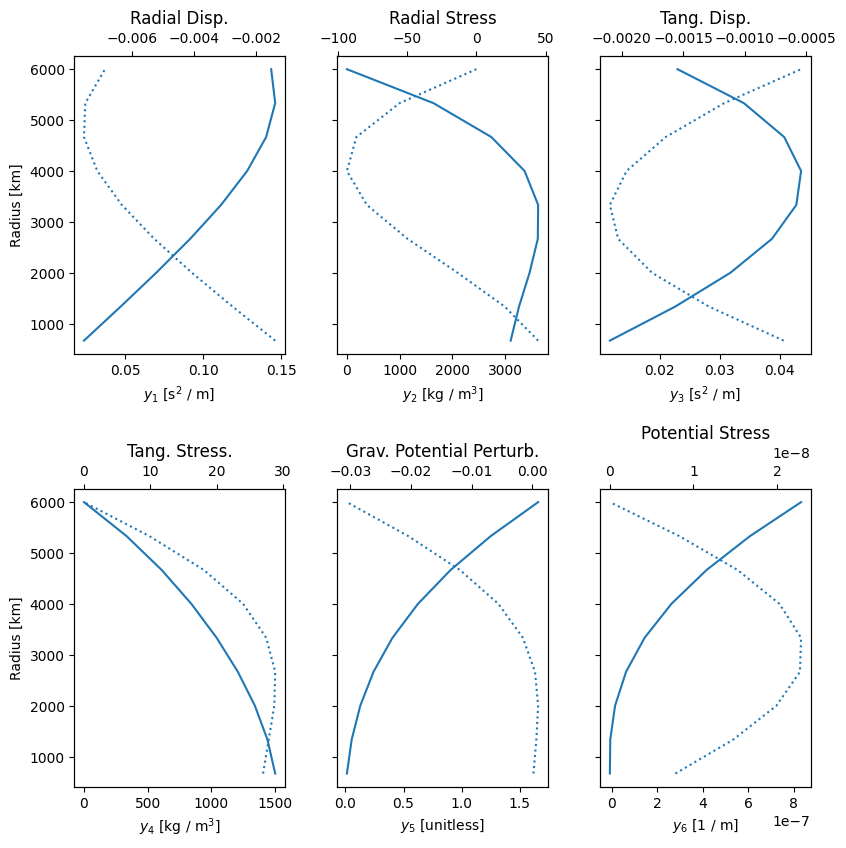

Steps Required:
[[12 15 12]]
[[0.6584766 -0.03056422j 1.29915312-0.06226471j 0.20796842-0.0049124j ]]
EOS Steps: [[13]
 [13]]


In [7]:
def test_1layer():

    rs_input = build_rs_input_homogeneous_layers(
        planet_radius                 = 6000.0e3,
        forcing_frequency             = np.pi * 2. / (86400. * 7.5),
        density_tuple                 = (5400.,),
        static_bulk_modulus_tuple     = (1.0e11,),
        static_shear_modulus_tuple    = (50.0e9,),
        bulk_viscosity_tuple          = (1.0e18,),
        shear_viscosity_tuple         = (1.0e18,),
        layer_type_tuple              = ('solid',),
        layer_is_static_tuple         = (False,),
        layer_is_incompressible_tuple = (False,),
        shear_rheology_model_tuple    = (Andrade(),),
        bulk_rheology_model_tuple     = (Elastic(),),
        thickness_fraction_tuple      = (1.0,),
        volume_fraction_tuple         = None,
        slices_tuple                  = None,
        slice_per_layer               = 10,
        perform_checks                = False)

    solution = radial_solver(*rs_input, **radial_solver_kwargs)
    
    print("Result Success:", solution.success, "Result Message:", solution.message)
    
    if run_times:
        %timeit radial_solver(*rs_input, **radial_solver_kwargs)
    solution.plot_ys()

    print("Steps Required:")
    print(solution.steps_taken)

    print(solution.love)
    print('EOS Steps:', solution.eos_steps_taken)

    return solution

# 0.5.4
#   New: 3.12ms; 3.07ms; 3.15ms
#   Old: 94ms; 96.6ms; 94.3ms
# 0.6.0a0
#   New: 3.37ms; 3.14ms; 3.16ms
#   Old: 94ms; 92.6ms; 92.4ms
# 0.6.0a6
#   New: 3.37ms; 3.14ms; 3.16ms
# 0.6.0a8
#   Apples to Apples: 3.85ms; 3.86ms; 4.0ms
#   Using Better tolerances: 
#     0.631ms; 0.628ms; 0.638ms
#     0.269ms; 0.266ms; 0.278ms
# 0.6.1
#   240us; 236us; 241us

solution = test_1layer()

# 2 Layers

Result Success: True Result Message: RadialSolver.ShootingMethod: Completed without any noted issues.
563 μs ± 9.46 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


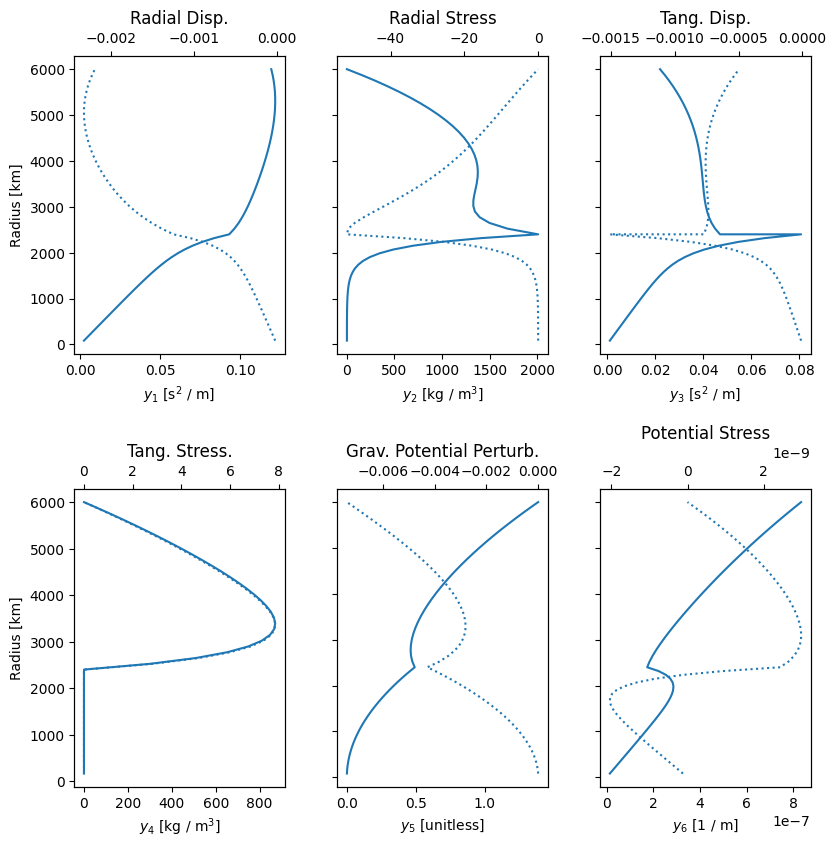

Steps Required:
[[33 56  0]
 [ 6  6  8]]
[[0.38779873-0.00738557j 0.77780085-0.01432472j 0.14384976-0.00323325j]]
EOS Steps: [[12  5]
 [12  5]
 [12  5]]


In [11]:
def test_2layer():

    rs_input = build_rs_input_homogeneous_layers(
        planet_radius                 = 6000.0e3,
        forcing_frequency             = np.pi * 2. / (86400. * 0.3),
        density_tuple                 = (11000.0, 3400.0),
        static_bulk_modulus_tuple     = (5.0e11, 1.0e11),
        static_shear_modulus_tuple    = (0.0, 50.0e9),
        bulk_viscosity_tuple          = (1000.0, 1.0e18),
        shear_viscosity_tuple         = (1000.0, 1.0e18),
        layer_type_tuple              = ('liquid', 'solid'),
        layer_is_static_tuple         = (False, False),
        layer_is_incompressible_tuple = (False, False),
        shear_rheology_model_tuple    = (Elastic(), Andrade()),
        bulk_rheology_model_tuple     = (Elastic(), Elastic()),
        thickness_fraction_tuple      = (0.4, 1.0 - 0.4),
        volume_fraction_tuple         = None,
        slices_tuple                  = None,
        slice_per_layer               = 30,
        perform_checks                = False)

    rs_kwargs = {**radial_solver_kwargs}
    # rs_kwargs['integration_rtol'] = 1.0e-10
    # rs_kwargs['integration_atol'] = 1.0e-15
    # rs_kwargs['starting_radius'] = 2.0e6
    
    solution = radial_solver(*rs_input, **rs_kwargs)
    
    print("Result Success:", solution.success, "Result Message:", solution.message)
    
    if run_times:
        %timeit radial_solver(*rs_input, **radial_solver_kwargs)
    solution.plot_ys()

    print("Steps Required:")
    print(solution.steps_taken)

    print(solution.love)
    print('EOS Steps:', solution.eos_steps_taken)

    return solution

# 0.5.3
#   3.06ms; 3.08ms
# 0.5.4
#   New: 2.39ms; 2.42ms; 2.43ms
#   Old: 99.4ms; 97.7ms; 100ms
# 0.6.0
#   New: 2.38ms; 2.41ms; 2.38ms
#   Old: 100ms; 97.8ms; 95.8ms
# 0.6.0a8
#   Apples to Apples: 3.41ms; 3.29ms; 3.28ms
#   Using Better tolerances: 
#     0.680ms; 0.690ms; 0.679ms
#     0.629ms; 0.636ms
# 0.6.1
#    565us; 563us; 563us

solution = test_2layer()

## 3 Layers

Result Success: True Result Message: RadialSolver.ShootingMethod: Completed without any noted issues.
478 μs ± 11.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


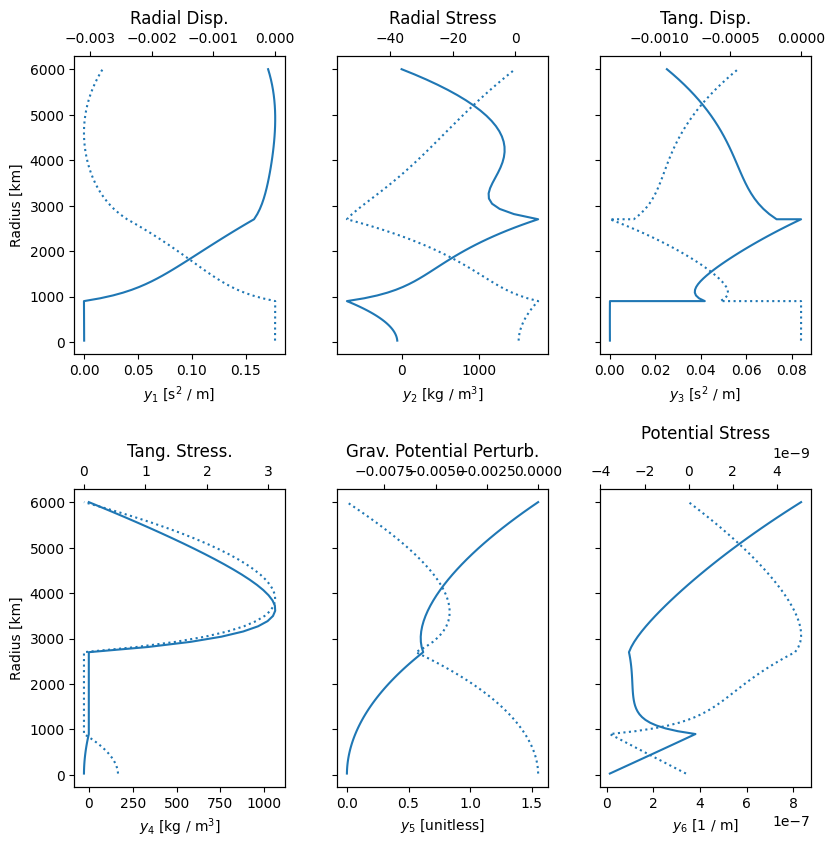

Steps Required:
[[ 9 10  7]
 [ 6  6  0]
 [ 6  6  7]]
[[0.55142468-0.00932479j 1.09673823-0.01797273j 0.1608642 -0.00285865j]]
EOS Steps: [[12  5  5]
 [12  5  4]
 [12  5  4]]


In [14]:
def test_3layer():

    rs_input = build_rs_input_homogeneous_layers(
        planet_radius                 = 6000.0e3,
        forcing_frequency             = np.pi * 2. / (86400. * 0.1),
        density_tuple                 = (9600.0, 8000.0, 3400.0),
        static_bulk_modulus_tuple     = (10.0e11, 5.0e11, 1.0e11),
        static_shear_modulus_tuple    = (150.0e9, 0.0, 50.0e9),
        bulk_viscosity_tuple          = (1.0e27, 1000.0, 1.0e18),
        shear_viscosity_tuple         = (1.0e27, 1000.0, 1.0e18),
        layer_type_tuple              = ('solid', 'liquid', 'solid'),
        layer_is_static_tuple         = (False, False, False),
        layer_is_incompressible_tuple = (False, False, False),
        shear_rheology_model_tuple    = (Andrade(), Elastic(), Andrade()),
        bulk_rheology_model_tuple     = (Elastic(), Elastic(), Elastic()),
        thickness_fraction_tuple      = (0.15, 0.30, 1.0 - 0.30 - 0.15),
        volume_fraction_tuple         = None,
        slices_tuple                  = None,
        slice_per_layer               = 30,
        perform_checks                = False)

    rs_kwargs = {**radial_solver_kwargs}
    # rs_kwargs['integration_rtol'] = 1.0e-10
    # rs_kwargs['integration_atol'] = 1.0e-15
    # rs_kwargs['starting_radius'] = 1.0e6
    
    solution = radial_solver(*rs_input, **rs_kwargs)
    
    print("Result Success:", solution.success, "Result Message:", solution.message)
    
    if run_times:
        %timeit radial_solver(*rs_input, **radial_solver_kwargs)
    solution.plot_ys()

    print("Steps Required:")
    print(solution.steps_taken)

    print(solution.love)
    print('EOS Steps:', solution.eos_steps_taken)

    return solution

# 0.5.4
# New: 1.54ms; 1.53ms; 1.55ms
# Old: 112ms; 114ms; 116ms
# 0.6.0a8
#   Apples to Apples: 1.24ms; 1.23ms; 1.23ms
#   Using Better tolerances: 
#     0.625ms; 0.665ms; 0.654ms
#     0.512ms; 0.536ms; 0.535ms
# 0.6.1
#    463us; 462us; 478us

test_3layer()

## 4 Layers (Low Density Liquid)

Result Success: True Result Message: RadialSolver.ShootingMethod: Completed without any noted issues.
685 μs ± 8.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


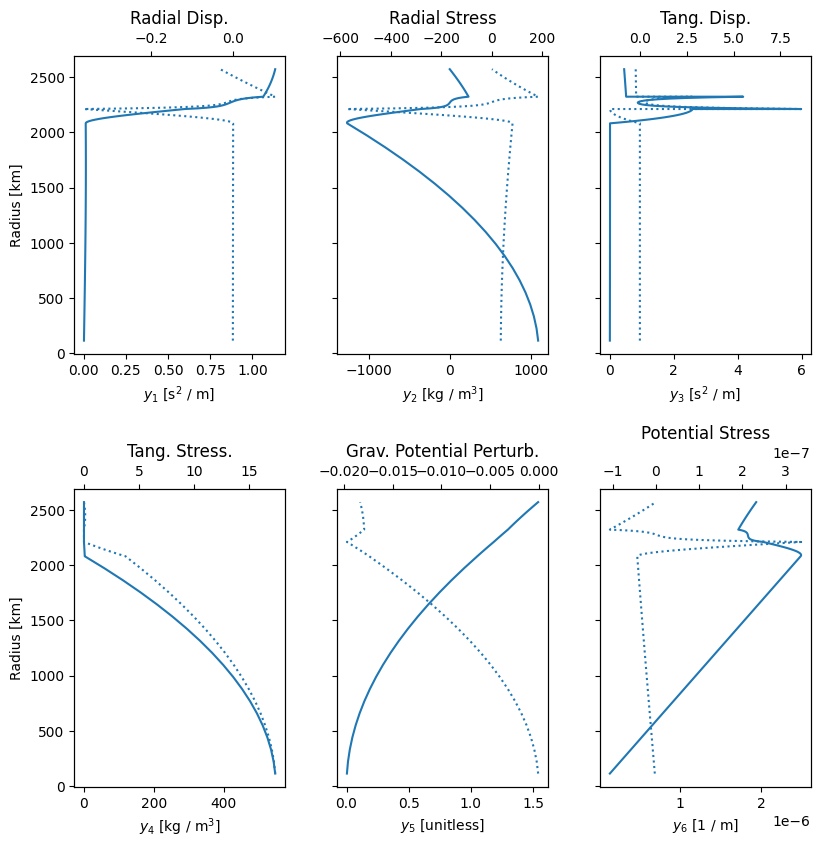

Steps Required:
[[ 252  383  340]
 [8044 7056 8658]
 [  57   57    0]
 [  84   78  822]]
[[0.54100729-0.01835853j 1.51465377-0.04112374j 0.59686904-0.29632616j]]
EOS Steps: [[13  4  4  4]
 [13  4  4  4]
 [13  4  4  4]]


In [15]:

def test_4layer(forcing_day, is_static=False, is_incomp=False, use_newton=False, running_array=False):

    if use_newton:
        ocean_rheo = Newton()
    else:
        ocean_rheo = Elastic()
    
    rs_input = build_rs_input_homogeneous_layers(
        planet_radius                 = 2574765.0,
        forcing_frequency             = np.pi * 2. / (86400. * forcing_day),
        density_tuple                 = (2565.0, 1250.0, 1122.0, 950.0),
        static_bulk_modulus_tuple     = (100.0e9, 25.0e9, 3.10e9, 9.70E+09),
        static_shear_modulus_tuple    = (50.0e9, 4 * 3.24E+09, 0.0, 3.24E+09),
        bulk_viscosity_tuple          = (1.0e27, 2 * 3.24E+09, 1000.0, 1.00E+12),
        shear_viscosity_tuple         = (1.0e27, 2 * 3.24E+09, 1000.0, 1.00E+12),
        layer_type_tuple              = ('solid', 'solid', 'liquid', 'solid'),
        layer_is_static_tuple         = (False, False, is_static, False),
        layer_is_incompressible_tuple = (False, False, is_incomp, False),
        shear_rheology_model_tuple    = (Maxwell(), Maxwell(), ocean_rheo, Maxwell()),
        bulk_rheology_model_tuple     = (Elastic(), Elastic(), Elastic(), Elastic()),
        thickness_fraction_tuple      = (0.80901, 0.05049, 0.04350, 0.09700),
        volume_fraction_tuple         = None,
        slices_tuple                  = None,
        slice_per_layer               = 20,
        perform_checks                = False)

    rs_kwargs = {**radial_solver_kwargs}
    rs_kwargs['integration_rtol'] = 1.0e-18
    rs_kwargs['integration_atol'] = 1.0e-21
    rs_kwargs['starting_radius'] = 0.0
    
    solution = radial_solver(*rs_input, **rs_kwargs)

    if not running_array:
        print("Result Success:", solution.success, "Result Message:", solution.message)
        
        if run_times:
            %timeit radial_solver(*rs_input, **radial_solver_kwargs)
        solution.plot_ys()
    
        print("Steps Required:")
        print(solution.steps_taken)
    
        print(solution.love)
        print('EOS Steps:', solution.eos_steps_taken)

    return solution

solution = test_4layer(5.0)

Working on index: 99

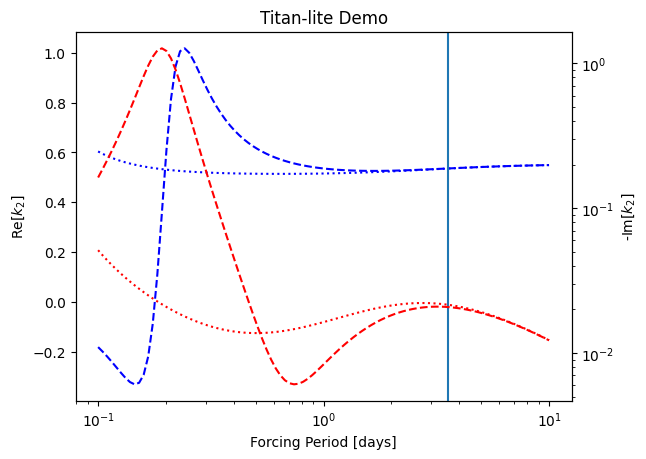

In [6]:
days = np.logspace(-1, 1, 100)
k2s = np.empty(days.shape, dtype=np.complex128)
k2s_static = np.empty(days.shape, dtype=np.complex128)
k2s_dyn_incomp = np.empty(days.shape, dtype=np.complex128)

for d_i, day in enumerate(days):
    print("Working on index:", d_i, end='\r')
    # solution = test_4layer(day)

    # if solution.success:
    #     k2s[d_i] = solution.k
    # else:
    k2s[d_i] = np.nan

    solution = test_4layer(day, True, running_array=True)
    if solution.success:
        k2s_static[d_i] = solution.k
    else:
        k2s_static[d_i] = np.nan

    solution = test_4layer(day, False, True, running_array=True)
    if solution.success:
        k2s_dyn_incomp[d_i] = solution.k
    else:
        k2s_dyn_incomp[d_i] = np.nan


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(days, np.real(k2s), c='b')
ax.plot(days, np.real(k2s_static), c='b', ls=':')
ax.plot(days, np.real(k2s_dyn_incomp), c='b', ls='--')
ax2.plot(days, -np.imag(k2s), c='r')
ax2.plot(days, -np.imag(k2s_static), c='r', ls=':')
ax2.plot(days, -np.imag(k2s_dyn_incomp), c='r', ls='--')
ax.axvline(x=3.551)
ax.set(xlabel='Forcing Period [days]', ylabel='Re[$k_{2}$]', title="Titan-lite Demo", xscale='log')
ax2.set(xlabel='Forcing Period [days]', ylabel='-Im[$k_{2}$]', yscale='log', xscale='log')

plt.show()